In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('car_fuel_efficiency.csv')
data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

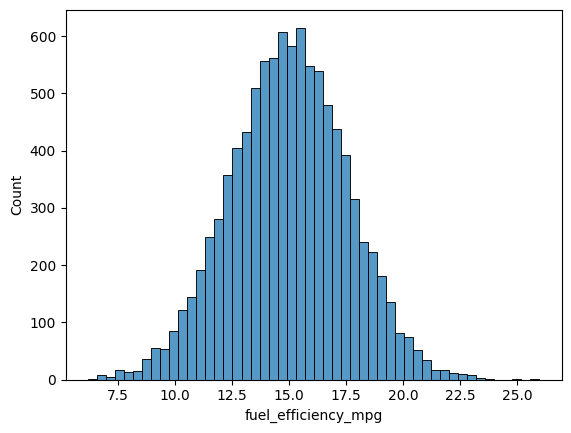

In [11]:
sns.histplot(data['fuel_efficiency_mpg'], bins=50)

### Question 1

In [18]:
data[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
dtype: int64

### Question 2

In [19]:
data['horsepower'].median()

149.0

### Question 3

In [4]:
filtered_df = data[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
filtered_df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [24]:
np.random.seed(42)

n = len(filtered_df)

n_val = int(n * 0.02)
n_test = int(n * 0.02)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_train = filtered_df.iloc[idx[:n_train]]
df_val = filtered_df.iloc[idx[n_train:n_train+n_val]]
df_test = filtered_df.iloc[idx[n_train+n_val:]]

In [26]:
n_val, n_test, n_train

(194, 194, 9316)

In [27]:
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

In [29]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [28]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [6]:
def train_linear_regression_without_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [7]:
def train_linear_regression_with_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [8]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()

    return np.sqrt(mse)

### Option 1: With 0

In [9]:
def prepare_X_with_0(df):
    df = df.copy()

    df_fill = df.fillna(0)
    X = df_fill.values

    return X

#### Without Regularization

In [91]:
X_train = prepare_X_with_0(df_train)
w0, w = train_linear_regression_without_reg(X_train, y_train)

X_val = prepare_X_with_0(df_val)
y_pred = w0 + X_val.dot(w)

In [92]:
round(rmse(y_val, y_pred), 2)

0.5101275047502933

#### With Regularization

In [113]:
X_train = prepare_X_with_0(df_train)
w0, w = train_linear_regression_with_reg(X_train, y_train, r=0.0001)

X_val = prepare_X_with_0(df_val)
y_pred = w0 + X_val.dot(w)

In [114]:
round(rmse(y_val, y_pred), 2)

0.5101288687451415

### Option 2: With Mean

In [119]:
df_train_mean = round(df_train['horsepower'].mean())
def prepare_X_with_mean(df):
    df = df.copy()

    df_fill = df.fillna(df_train_mean)
    X = df_fill.values

    return X

#### Without Regularization

In [121]:
X_train = prepare_X_with_mean(df_train)
w0, w = train_linear_regression_without_reg(X_train, y_train)

X_val = prepare_X_with_0(df_val)
y_pred = w0 + X_val.dot(w)

In [122]:
round(rmse(y_val, y_pred), 2)

0.6185880292386995

#### With Regularization

In [127]:
X_train = prepare_X_with_mean(df_train)
w0, w = train_linear_regression_with_reg(X_train, y_train, r=0.0001)

X_val = prepare_X_with_0(df_val)
y_pred = w0 + X_val.dot(w)

In [129]:
round(rmse(y_val, y_pred), 2)

0.62

### Question 4

In [147]:
X_train = prepare_X_with_0(df_train)

In [148]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_with_reg(X_train, y_train, r=r)

    X_val = prepare_X_with_0(df_val)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)

    print(f"{r}: {score}{nl}")

0: 0.51

0.01: 0.51

0.1: 0.51

1: 0.52

5: 0.52

10: 0.52

100: 0.52



### Question 5

In [12]:
seeds = range(10)
rmse_scores = []

for seed in seeds:
    print(f"Processing seed: {seed}...")
    
    np.random.seed(seed)

    n = len(filtered_df) 
    n_val = int(n * 0.02)
    n_test = int(n * 0.02)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = filtered_df.iloc[idx[:n_train]]
    df_val = filtered_df.iloc[idx[n_train:n_train+n_val]]
    df_test = filtered_df.iloc[idx[n_train+n_val:]]

    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values
    y_test = df_test['fuel_efficiency_mpg'].values

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X_with_0(df_train)
    w0, w = train_linear_regression_without_reg(X_train, y_train)
    
    X_val = prepare_X_with_0(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

for seed, score in zip(seeds, rmse_scores):
    print(f"Seed {seed}: RMSE = {score:.4f}")
print(f'Standard Deviation of RMSE: {np.std(rmse_scores):.3f}')

Processing seed: 0...
Processing seed: 1...
Processing seed: 2...
Processing seed: 3...
Processing seed: 4...
Processing seed: 5...
Processing seed: 6...
Processing seed: 7...
Processing seed: 8...
Processing seed: 9...
Seed 0: RMSE = 0.5673
Seed 1: RMSE = 0.5196
Seed 2: RMSE = 0.5127
Seed 3: RMSE = 0.5498
Seed 4: RMSE = 0.5377
Seed 5: RMSE = 0.5239
Seed 6: RMSE = 0.5043
Seed 7: RMSE = 0.4749
Seed 8: RMSE = 0.4681
Seed 9: RMSE = 0.5325
Standard Deviation of RMSE: 0.029


In [ ]:
Seed 0: RMSE = 0.5670
Seed 1: RMSE = 0.5200
Seed 2: RMSE = 0.5130
Seed 3: RMSE = 0.5500
Seed 4: RMSE = 0.5380
Seed 5: RMSE = 0.5240
Seed 6: RMSE = 0.5040
Seed 7: RMSE = 0.4750
Seed 8: RMSE = 0.4680
Seed 9: RMSE = 0.5330

### Question 6

In [171]:
np.random.seed(9)

n = len(filtered_df)

n_val = int(n * 0.02)
n_test = int(n * 0.02)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_train = filtered_df.iloc[idx[:n_train]]
df_val = filtered_df.iloc[idx[n_train:n_train+n_val]]
df_test = filtered_df.iloc[idx[n_train+n_val:]]

In [172]:
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

In [173]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [174]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [175]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [176]:
X_full_train = prepare_X_with_0(df_full_train)

In [177]:
y_full_train = np.concatenate([y_train, y_val])

In [178]:
w0, w = train_linear_regression_with_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X_with_0(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

0.5167867959716178